# Backend Networking Topics Guide

---




## 🧭 Table of Contents

1. [OSI Model & Network Layers](#osi-model)
2. [TCP/IP Protocol Suite](#tcp-ip)
3. [HTTP & HTTPS](#http-https)
4. [DNS (Domain Name System)](#dns)
5. [SSH (Secure Shell)](#ssh)
6. [WebSockets](#websockets)
7. [Load Balancing](#load-balancing)
8. [Reverse Proxy](#reverse-proxy)
9. [API Protocols](#api-protocols)
10. [Network Security](#network-security)
11. [Performance Optimization](#performance-optimization)
12. [Monitoring & Debugging](#monitoring-debugging)
13. [Best Practices Summary](#best-practices)

---

## 1. OSI Model & Network Layers {#osi-model}

### 📚 OSI (Open Systems Interconnection) Layers

1. **Application Layer** – HTTP, FTP, SMTP, DNS
2. **Presentation Layer** – Data encryption, compression, translation
3. **Session Layer** – Session management, authentication
4. **Transport Layer** – TCP, UDP (port numbers, reliability)
5. **Network Layer** – IP addressing, routing
6. **Data Link Layer** – MAC addresses, switches
7. **Physical Layer** – Physical cables, signals

### 🔑 Key Concepts for Backend

* Most backend work happens at **layers 4–7**.
* Understanding **TCP vs UDP** is crucial.
* HTTP operates at **layer 7** but relies on TCP at **layer 4**.

---

## 2. TCP/IP Protocol Suite {#tcp-ip}

### 🔹 TCP (Transmission Control Protocol)

**Characteristics:**

* Connection-oriented (three-way handshake)
* Reliable, ordered delivery
* Flow/congestion control, error checking

**Three-Way Handshake:**

```
Client → Server: SYN
Server → Client: SYN-ACK
Client → Server: ACK
```

**Use Cases:** HTTP, HTTPS, SSH, FTP, database connections

### 🔸 UDP (User Datagram Protocol)

**Characteristics:**

* Connectionless
* No guaranteed delivery or ordering
* Faster, lower overhead

**Use Cases:** DNS, VoIP, video streaming, gaming

### 🌐 IP Addressing

* **IPv4:** 32-bit (e.g., 192.168.1.1)
* **IPv6:** 128-bit (e.g., 2001:db8::7334)

**Ports:**

* 0–1023 → Well-known (HTTP:80, HTTPS:443)
* 1024–49151 → Registered
* 49152–65535 → Dynamic/private

---

## 3. HTTP & HTTPS {#http-https}

### 🧩 HTTP Basics

**Request Example:**

```
GET /api/users HTTP/1.1
Host: example.com
Authorization: Bearer token123
```

**Response Example:**

```
HTTP/1.1 200 OK
Content-Type: application/json

{"users": [...]} 
```

### HTTP Methods & Status Codes

**Methods:** GET, POST, PUT, PATCH, DELETE, HEAD, OPTIONS
**Status Codes:**

* **2xx**: Success (200 OK, 201 Created)
* **3xx**: Redirects (301, 302)
* **4xx**: Client Errors (400, 401, 403, 404, 429)
* **5xx**: Server Errors (500, 502, 503, 504)

### 🔒 HTTPS & TLS Handshake

**Steps:** Client Hello → Server Hello → Certificate → Key Exchange → Encrypted Session
**Concepts:** TLS/SSL, CA, symmetric + asymmetric encryption, PFS

### ⚡ HTTP/2 & HTTP/3

* **HTTP/2:** Multiplexing, binary framing, HPACK
* **HTTP/3:** Based on QUIC (UDP), faster setup, improved reliability

---

## 4. DNS (Domain Name System) {#dns}

### 🌍 How DNS Works

```
User → Resolver → Root → TLD → Authoritative → IP Address
```

**Record Types:** A, AAAA, CNAME, MX, TXT, NS, SOA, PTR
**TTL (Time To Live):** Controls caching duration
**Backend Tips:** DNS caching, failover, and load balancing

---

## 5. SSH (Secure Shell) {#ssh}

### 🔐 SSH Basics

* **Port:** 22
* **Features:** Remote shell, SFTP, tunneling, port forwarding

**Key-Based Authentication:**

```bash
ssh-keygen -t ed25519 -C "you@example.com"
ssh-copy-id user@server
ssh user@server
```

**Tunneling:**

```bash
ssh -L 8080:localhost:80 user@remote-server
```

**Best Practices:**

* Disable root login, change port, use keys only, fail2ban, update regularly

---

## 6. WebSockets {#websockets}

### 🔄 Protocol Overview

**Upgrade Handshake:**

```
GET /chat HTTP/1.1
Upgrade: websocket
Connection: Upgrade
```

**Comparison:**

* **HTTP:** Request-response
* **WebSocket:** Full-duplex, persistent, real-time

**Use Cases:** Chat, notifications, collaborative apps, IoT, live data

---

## 7. Load Balancing {#load-balancing}

### ⚙️ Algorithms

Round Robin, Least Connections, IP Hash, Weighted, Least Response Time
**Health Checks:** Active (`/health`) or passive
**Session Persistence:** Sticky sessions vs shared sessions (Redis)

### Layer Comparison

* **L4:** Based on IP/port (fast)
* **L7:** Based on content (flexible)

---

## 8. Reverse Proxy {#reverse-proxy}

### 🔁 Function

Sits between clients and backend servers for load distribution, SSL offload, caching, and security.

**Example (Nginx):**

```nginx
upstream backend { server backend1; server backend2; }
server {
    listen 80;
    location / { proxy_pass http://backend; }
}
```

**Popular Tools:** Nginx, HAProxy, Traefik, Envoy

**Forward vs Reverse Proxy:**

* **Forward:** Client-side anonymity
* **Reverse:** Server-side load balancing

---

## 9. API Protocols {#api-protocols}

### 🌐 REST

Stateless, resource-based, uses HTTP verbs and status codes.

### 🧩 GraphQL

Single endpoint, flexible queries, strong typing.

### ⚡ gRPC

Binary protocol using Protocol Buffers, HTTP/2-based, streaming, microservice-friendly.

### 🧱 SOAP

XML-based, strict WSDL definitions, enterprise-grade, verbose.

---

## 10. Network Security {#network-security}

### 🧰 CORS

Restricts cross-origin requests using headers like `Access-Control-Allow-Origin`.

### 🕒 Rate Limiting

Prevents abuse via fixed/sliding windows, token/leaky bucket algorithms.

### 🧱 DDoS Protection

Layer 3/4 (SYN floods), Layer 7 (HTTP floods) mitigated by WAF, rate limits.

### 🔑 Authentication & Authorization

API Keys, JWT, OAuth2.0, and mTLS for secure service communication.

### 🔥 Firewalls

Network & WAF for IP filtering and Layer 7 protection.

### 🌐 VPN

Encrypts traffic, site-to-site or remote access (WireGuard, IPSec, OpenVPN).

---

## 11. Performance Optimization {#performance-optimization}

### ⚡ Techniques

* Connection pooling
* CDN caching
* Gzip/Brotli compression
* TCP Fast Open & window scaling

**Server-Side Caching:** Redis, Memcached
**Client-Side Caching:** `Cache-Control`, `ETag`

---

## 12. Monitoring & Debugging {#monitoring-debugging}

### 🧪 Tools

* `curl` → HTTP requests
* `netstat` → Connections
* `tcpdump` → Packet capture
* `dig`, `nslookup` → DNS lookup
* `ping`, `traceroute` → Connectivity & path

### 📈 Key Metrics

Latency, throughput, error rate, connections, bandwidth, DNS time

---

## 13. Best Practices Summary {#best-practices}

✅ Always use HTTPS
✅ Handle errors and retries
✅ Use pooling and caching
✅ Apply timeouts and rate limiting
✅ Load balance for HA
✅ Monitor and log metrics
✅ Keep software updated
✅ Use CDN for assets
✅ Secure authentication
✅ Document and audit configurations


# Understanding Asynchronous vs Synchronous Programming

---



## 🧭 Table of Contents

1. [Introduction](#introduction)
2. [What is Synchronous Programming?](#sync)
3. [What is Asynchronous Programming?](#async)
4. [Key Differences](#differences)
5. [Examples in Practice](#examples)
6. [How Async Works Under the Hood](#under-the-hood)
7. [When to Use Each](#when-to-use)
8. [Common Async Patterns](#patterns)
9. [Real-World Backend Scenarios](#backend)
10. [Best Practices Summary](#best-practices)

---

## 1. Introduction {#introduction}

Modern applications often perform multiple tasks—fetching data, processing requests, and responding to users—all at once. Understanding **synchronous** vs **asynchronous** execution is essential for building scalable and efficient systems.

---

## 2. What is Synchronous Programming? {#sync}

### 🔹 Definition

Synchronous execution means tasks run **one after another**. Each task must complete before the next begins.

### 🧱 Characteristics

* Blocking: Each operation waits for the previous one to finish.
* Predictable and easy to debug.
* Suitable for simple, CPU-bound workflows.

### 🧩 Example (Python)

```python
print("Task 1 started")
time.sleep(2)  # blocking call
print("Task 1 done")
print("Task 2 started")
```

### 🕒 Execution Flow

```
|---Task 1---|---Task 2---|---Task 3---|
```

All tasks execute sequentially.

---

## 3. What is Asynchronous Programming? {#async}

### 🔸 Definition

Asynchronous execution allows tasks to run **concurrently**—you don’t have to wait for one task to finish before starting another.

### ⚙️ Characteristics

* Non-blocking I/O operations
* Event-driven execution
* Uses callbacks, promises, or async/await
* Improves scalability and responsiveness

### 🧩 Example (Python asyncio)

```python
import asyncio

async def task(name):
    print(f"{name} started")
    await asyncio.sleep(2)
    print(f"{name} done")

async def main():
    await asyncio.gather(task("Task 1"), task("Task 2"), task("Task 3"))

asyncio.run(main())
```

### 🕒 Execution Flow

```
|---Task 1---|
    |---Task 2---|
        |---Task 3---|
```

Tasks overlap, saving time.

---

## 4. Key Differences {#differences}

| Feature        | Synchronous    | Asynchronous                    |
| -------------- | -------------- | ------------------------------- |
| Execution      | Sequential     | Concurrent                      |
| Blocking       | Yes            | No                              |
| Resource Usage | Less efficient | More efficient                  |
| Complexity     | Easier         | Harder                          |
| Common Use     | Simple scripts | Network servers, I/O-heavy apps |

---

## 5. Examples in Practice {#examples}

### 🧠 JavaScript Example

**Synchronous:**

```javascript
console.log('Start');
console.log('End');
```

**Asynchronous:**

```javascript
console.log('Start');
setTimeout(() => console.log('Async Task Done'), 2000);
console.log('End');
```

**Output:**

```
Start
End
Async Task Done
```

---

## 6. How Async Works Under the Hood {#under-the-hood}

### 🧩 Event Loop

* Core of asynchronous architecture.
* Handles queued events and schedules callbacks.

**Concept Flow:**

1. Task sent to event loop.
2. If non-blocking → task continues.
3. Event loop monitors and triggers callback when done.

**Languages with Event Loops:** JavaScript (Node.js), Python (asyncio), Go (goroutines).

---

## 7. When to Use Each {#when-to-use}

| Scenario                              | Recommended Approach         |
| ------------------------------------- | ---------------------------- |
| CPU-intensive tasks                   | Synchronous / multithreading |
| Network requests (HTTP, DB, file I/O) | Asynchronous                 |
| Simple scripts                        | Synchronous                  |
| Real-time applications                | Asynchronous                 |

---

## 8. Common Async Patterns {#patterns}

### 🧩 Callbacks

Functions passed as arguments to be executed after an operation finishes.

### 🔗 Promises

Used in JavaScript for chaining asynchronous operations.

```javascript
fetch('/api').then(res => res.json()).then(console.log);
```

### ⏳ async/await

Cleaner syntax for promises and coroutines.

### ⚡ Thread Pools / Executors

Used in Python (`concurrent.futures`) or Java for parallelism.

---

## 9. Real-World Backend Scenarios {#backend}

### 🌐 Example 1: REST API

* **Sync:** Each request handled one by one → slower.
* **Async:** Multiple requests handled concurrently → faster.

### 🧮 Example 2: Database Operations

Using async drivers (`asyncpg`, `aiomysql`) prevents blocking while waiting for DB responses.

### 💬 Example 3: Messaging Queues

RabbitMQ, Kafka, and Celery use async models to handle background tasks.

---

## 10. Best Practices Summary {#best-practices}

✅ Use async for I/O-bound tasks
✅ Keep async functions lightweight
✅ Avoid mixing blocking and non-blocking code
✅ Use structured concurrency (e.g., `asyncio.gather`)
✅ Handle exceptions properly with `try/await/except`
✅ Benchmark before adopting async everywhere

---

### 🏁 Summary

Synchronous programming is straightforward and predictable, while asynchronous programming offers scalability and efficiency for high-performance backends. Choosing between them depends on your application’s workload and concurrency needs.


```python
### Example: FastAPI (Async vs Sync)

Let's look at an example demonstrating both synchronous and asynchronous endpoints in a **FastAPI** application.

```python
from fastapi import FastAPI
import time
import asyncio

app = FastAPI()

# Synchronous endpoint
def slow_sync_task():
    time.sleep(5)  # Blocking operation
    return "Sync task completed"

@app.get("/sync")
def sync_endpoint():
    result = slow_sync_task()
    return {"message": result}

# Asynchronous endpoint
async def slow_async_task():
    await asyncio.sleep(5)  # Non-blocking operation
    return "Async task completed"

@app.get("/async")
async def async_endpoint():
    result = await slow_async_task()
    return {"message": result}
```

### Explanation

* **`/sync` endpoint**: Uses `time.sleep(5)`, which **blocks** the main thread. If multiple clients call it, they must wait sequentially.
* **`/async` endpoint**: Uses `await asyncio.sleep(5)`, which **does not block** the event loop. Multiple clients can run concurrently.

### Benchmark (Conceptual)

| Request Type | Response Time (5 requests) | Behavior   |
| ------------ | -------------------------- | ---------- |
| `/sync`      | ~25 seconds total          | Sequential |
| `/async`     | ~5 seconds total           | Concurrent |

### When to Use

* **Use Sync** for CPU-bound tasks (e.g., heavy computations, image processing).
* **Use Async** for I/O-bound tasks (e.g., database queries, API calls, waiting for I/O).

### Run Example

Save this code as `main.py` and run:

```bash
uvicorn main:app --reload
```

Then open your browser:

* [http://127.0.0.1:8000/sync](http://127.0.0.1:8000/sync)
* [http://127.0.0.1:8000/async](http://127.0.0.1:8000/async)

### Summary

This example shows that **asynchronous endpoints** make FastAPI much faster and more scalable for I/O-heavy workloads, while **synchronous endpoints** can still be useful for simpler or CPU-heavy tasks.


```

# Asynchronous Programming and Async Backends Across Languages
---


## 1. Introduction

Asynchronous programming is a design paradigm that enables programs to handle multiple operations concurrently without blocking the main execution thread. This is crucial for **modern web backends**, where responsiveness, scalability, and performance are key.

Synchronous (or blocking) code executes tasks one after another, while **asynchronous (non-blocking)** code allows the system to perform other tasks while waiting for operations like network calls, database queries, or file I/O to complete.

---

## 2. Why Asynchronous Programming Matters

When a backend API receives multiple simultaneous requests:

* **Synchronous servers** handle them sequentially or use multiple threads (which increases memory usage).
* **Asynchronous servers** handle them concurrently on the same thread via an event loop, improving throughput and efficiency.

This drastically reduces waiting time and resource usage — especially for **I/O-bound** workloads (e.g., network, file, or database operations).

---

## 3. FastAPI (Python)

### 3.1 Overview

[FastAPI](https://fastapi.tiangolo.com/) is a high-performance Python web framework built on **ASGI (Asynchronous Server Gateway Interface)**. It fully supports Python's `asyncio`, enabling concurrent request handling.

### 3.2 Code Example

```python
from fastapi import FastAPI
import time
import asyncio

app = FastAPI()

# Synchronous Endpoint
def slow_sync_task():
    time.sleep(5)
    return "Sync task completed"

@app.get("/sync")
def sync_endpoint():
    return {"message": slow_sync_task()}

# Asynchronous Endpoint
async def slow_async_task():
    await asyncio.sleep(5)
    return "Async task completed"

@app.get("/async")
async def async_endpoint():
    return {"message": await slow_async_task()}
```

### 3.3 How FastAPI Speeds Up Responses

* Uses **ASGI servers** like **Uvicorn** or **Hypercorn** to handle multiple requests concurrently on one event loop.
* Integrates with `asyncio` to perform **non-blocking I/O**.
* Reduces thread context switching overhead.

**Result:** Thousands of concurrent requests can be handled efficiently without increasing threads or blocking the CPU.

---

## 4. NestJS (JavaScript/TypeScript)

### 4.1 Overview

[NestJS](https://nestjs.com/) is a progressive Node.js framework that supports **asynchronous operations natively** through **Promises** and **async/await**. It’s built on top of **Express** or **Fastify**, both of which use Node.js’s **event-driven, non-blocking I/O** model.

### 4.2 Example

```typescript
import { Controller, Get } from '@nestjs/common';
import { AppService } from './app.service';

@Controller()
export class AppController {
  constructor(private readonly appService: AppService) {}

  @Get('sync')
  syncEndpoint(): string {
    const start = Date.now();
    while (Date.now() - start < 5000) {} // Blocking loop
    return 'Sync task completed';
  }

  @Get('async')
  async asyncEndpoint(): Promise<string> {
    await new Promise(resolve => setTimeout(resolve, 5000)); // Non-blocking
    return 'Async task completed';
  }
}
```

### 4.3 How NestJS Speeds Up Processing

* Node.js uses a **single-threaded event loop**, allowing it to handle thousands of concurrent connections efficiently.
* Non-blocking I/O ensures that while one request waits (e.g., for a database call), others continue to be processed.
* When used with **Fastify**, NestJS achieves higher performance through optimized HTTP handling.

**Result:** NestJS scales efficiently under heavy network loads with minimal thread management.

---

## 5. Comparison: FastAPI vs. NestJS

| Feature              | **FastAPI (Python)**            | **NestJS (Node.js)**                       |
| -------------------- | ------------------------------- | ------------------------------------------ |
| Language Runtime     | Python + `asyncio`              | JavaScript/TypeScript + Node.js Event Loop |
| Server Interface     | ASGI                            | Express/Fastify (non-blocking I/O)         |
| Concurrency Model    | `async/await` with coroutines   | `async/await` with promises                |
| Performance Strength | Data processing, ML integration | Real-time APIs, microservices              |
| Scaling Approach     | Multi-worker ASGI processes     | Single-threaded, event-driven              |

---

## 6. How Async Improves Request/Response Cycle

| Aspect           | Synchronous     | Asynchronous     |
| ---------------- | --------------- | ---------------- |
| Execution        | Sequential      | Concurrent       |
| Blocking         | Yes             | No               |
| Scalability      | Limited         | High             |
| Resource Usage   | High (threads)  | Low (event loop) |
| Typical Use Case | CPU-bound tasks | I/O-bound tasks  |

**Mechanism of Speed:**

* Requests don’t wait for others to finish.
* Event loops manage task scheduling efficiently.
* Fewer context switches and idle time.
* Efficient memory utilization.

---

## 7. Best Practices for Async Backends

* Avoid blocking operations (e.g., `time.sleep`, long loops) inside async code.
* Use async-supported libraries for I/O (like `httpx` for FastAPI, `axios` for NestJS).
* Configure the right number of event loops or workers.
* Monitor performance using APM tools (like Prometheus, Grafana, or Elastic APM).
* Combine async with message queues (RabbitMQ, Kafka) for background tasks.

---

## 8. Summary

Both **FastAPI (Python)** and **NestJS (JavaScript/TypeScript)** leverage asynchronous programming to build **highly scalable and responsive backends**.

* **FastAPI** uses Python’s `asyncio` with ASGI servers to handle non-blocking I/O efficiently.
* **NestJS** relies on Node.js’s event-driven architecture and async/await pattern for concurrency.

In both cases, async design allows the backend to serve **more clients, faster**, with fewer resources — a critical factor for modern web and microservice architectures.


# Backend Execution Design Patterns (In-Depth)

---




## 4. Backend Execution Design Patterns (Detailed Explanation with Examples)

### 4.1 Request-Response Patterns

**Synchronous Pattern:**

* The client sends a request and waits for the server to complete processing and respond.
* Suitable for simple, quick operations.
* **Example (FastAPI):**

  ```python
  from fastapi import FastAPI
  import time

  app = FastAPI()

  @app.get("/sync-task")
  def sync_task():
      time.sleep(3)  # Blocking operation
      return {"message": "Task completed synchronously"}
  ```

**Asynchronous Pattern:**

* The client sends a request, and the server immediately acknowledges it, then processes the task in the background.
* Best for long-running or I/O-bound operations.
* **Example (FastAPI):**

  ```python
  import asyncio

  @app.get("/async-task")
  async def async_task():
      await asyncio.sleep(3)  # Non-blocking
      return {"message": "Task completed asynchronously"}
  ```

---

### 4.2 Worker Queue Pattern

This pattern distributes workloads across background workers using **message queues** like RabbitMQ, Redis, or Kafka.

**Example (FastAPI + Celery + Redis):**

```python
# task_queue.py
from celery import Celery
import time

celery_app = Celery('tasks', broker='redis://localhost:6379/0')

@celery_app.task
def process_data(data):
    time.sleep(5)
    return f"Processed {data}"
```

```python
# main.py
from fastapi import FastAPI
from task_queue import process_data

app = FastAPI()

@app.post("/process")
def create_task(data: str):
    task = process_data.delay(data)
    return {"task_id": task.id, "status": "queued"}
```

This ensures heavy jobs don’t block HTTP responses.

---

### 4.3 Circuit Breaker Pattern

Prevents cascading failures by stopping repeated calls to a failing external service.

**Example (Python using PyCircuitBreaker):**

```python
from py_circuitbreaker import circuit

@circuit(failure_threshold=3, recovery_timeout=10)
def call_payment_gateway():
    # simulate call to remote service
    raise Exception("Service down!")
```

If the payment gateway fails repeatedly, the circuit opens, temporarily blocking further requests.

---

### 4.4 Retry Pattern

Retries failed operations automatically with backoff.

**Example (Python):**

```python
import requests, time

def fetch_data():
    for attempt in range(3):
        try:
            response = requests.get('https://api.example.com')
            return response.json()
        except Exception as e:
            time.sleep(2 ** attempt)  # Exponential backoff
    return {"error": "Service unavailable"}
```

---

### 4.5 Saga Pattern

Used in distributed systems to manage transactions with compensating actions.

**Example (Pseudo-flow):**

1. Order Service → creates order.
2. Payment Service → charges card.
3. Inventory Service → deducts stock.
4. If any fails → compensation: rollback previous steps.

In FastAPI, you can orchestrate this flow using async functions and an event bus.

---

### 4.6 CQRS (Command Query Responsibility Segregation)

Separates **write** operations (commands) from **read** operations (queries).

**Example:**

* Writes go through PostgreSQL.
* Reads are served from Redis for faster retrieval.

---

### 4.7 Event-Driven Architecture

All communication happens via **events** rather than direct API calls.

**Example:**

* FastAPI publishes events to Kafka.
* NestJS microservice consumes events asynchronously.

---

### 4.8 Bulkhead Pattern

Divides system components into isolated pools to prevent cascading failures.

**Example:** Separate thread pools for I/O and CPU operations.

---

### 4.9 Cache-Aside Pattern

The application checks the cache first before querying the database.

**Example (FastAPI + Redis):**

```python
import redis

cache = redis.Redis(host='localhost', port=6379, db=0)

def get_user(user_id):
    if cache.exists(user_id):
        return cache.get(user_id)
    user = db_get_user(user_id)
    cache.set(user_id, user)
    return user
```

---

### 4.10 Strangler Fig Pattern

Gradually replace legacy components by routing traffic from old to new services.

**Example:** Use an API Gateway (e.g., Kong or NGINX) to forward requests progressively.

---

### 4.11 Throttling Pattern

Controls request rate using algorithms like **Token Bucket**.

**Example (FastAPI Middleware):**

```python
from starlette.middleware.base import BaseHTTPMiddleware
from time import time

requests_log = {}

class RateLimitMiddleware(BaseHTTPMiddleware):
    async def dispatch(self, request, call_next):
        ip = request.client.host
        now = time()
        if ip in requests_log and now - requests_log[ip] < 1:
            return JSONResponse(status_code=429, content={"detail": "Too Many Requests"})
        requests_log[ip] = now
        return await call_next(request)
```

---

### 4.12 Backend for Frontend (BFF)

Each frontend (web, mobile, IoT) gets a dedicated backend layer.

**Example:**

* Web: FastAPI backend.
* Mobile: NestJS backend optimized for mobile payloads.

---

## 5. Advanced Communication Techniques (In-Depth)

### 5.1 Push vs Polling vs Long Polling

| Type                  | Description                                  | Example                        |
| --------------------- | -------------------------------------------- | ------------------------------ |
| **Polling**           | Client repeatedly requests data              | `setInterval(fetchData, 1000)` |
| **Long Polling**      | Server holds connection until data available | Chat app updates               |
| **Push (WebSockets)** | Full-duplex communication                    | Real-time dashboards           |


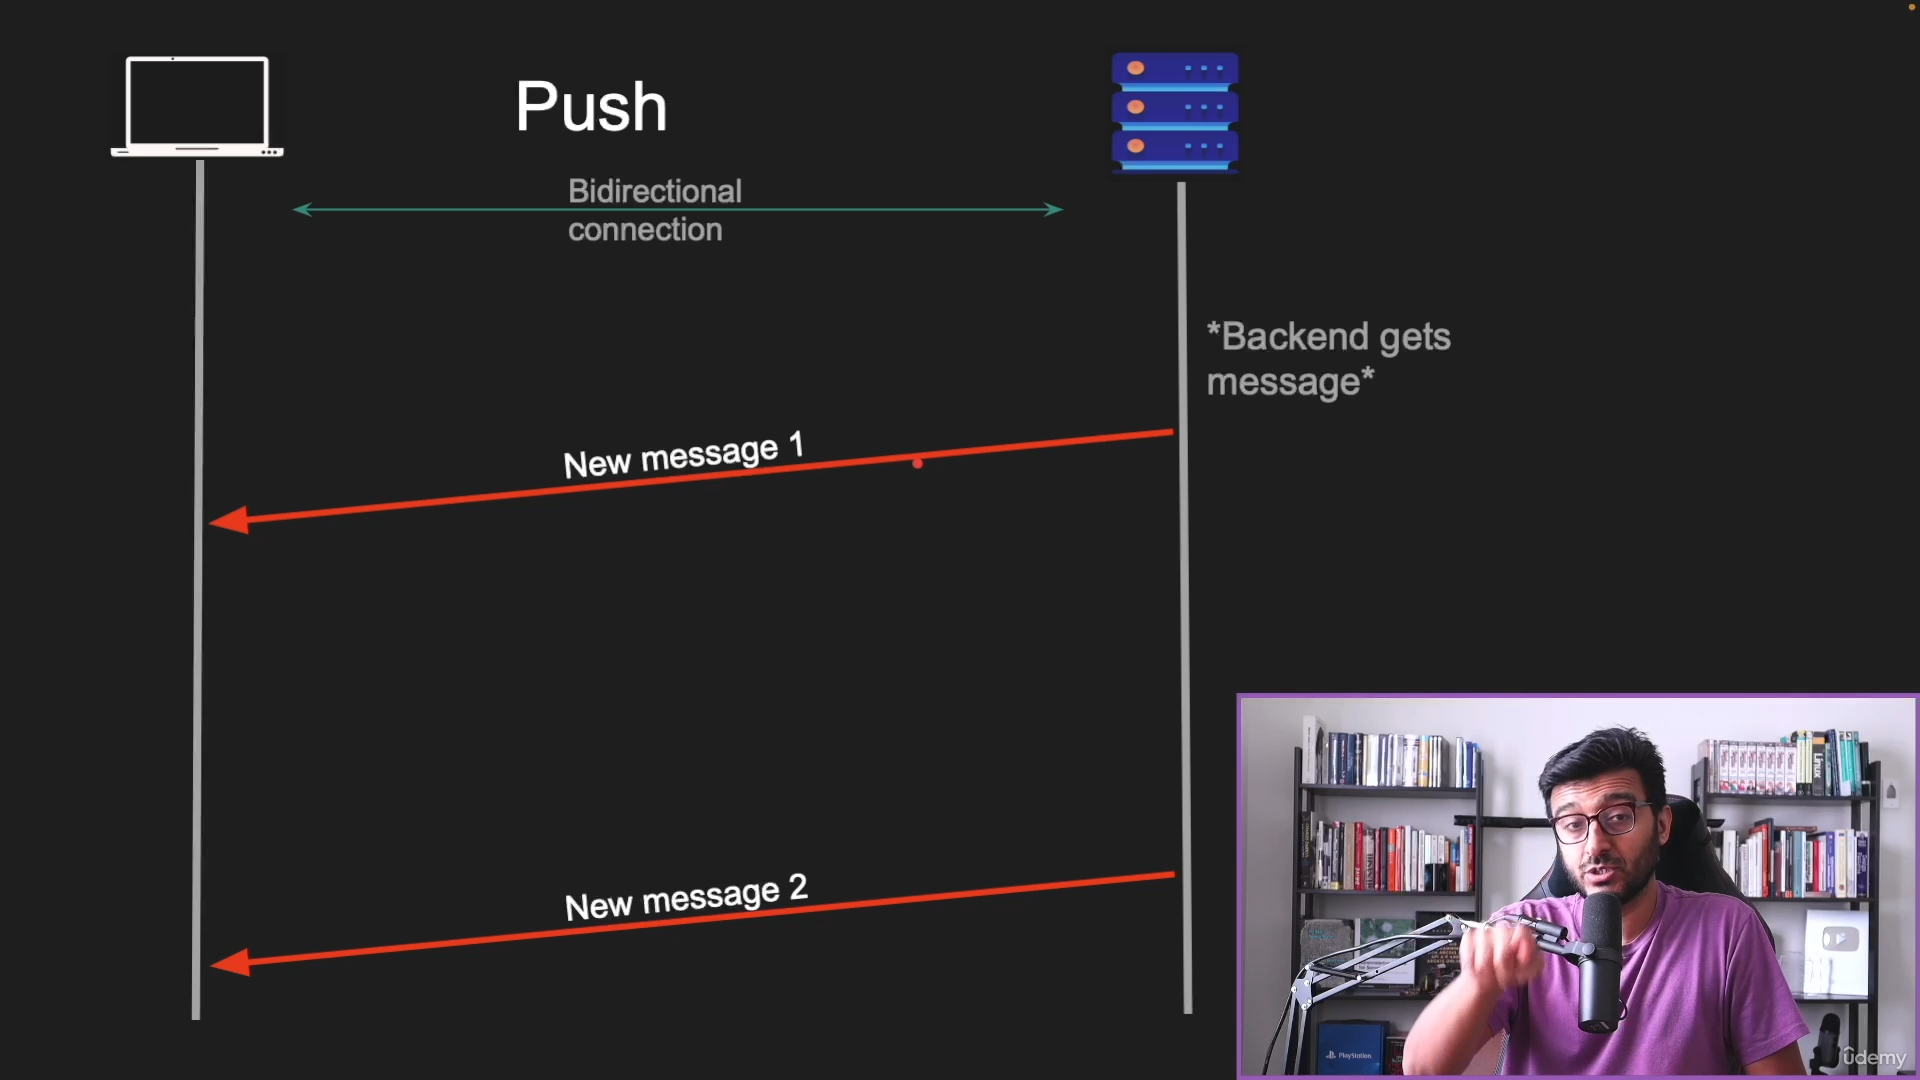
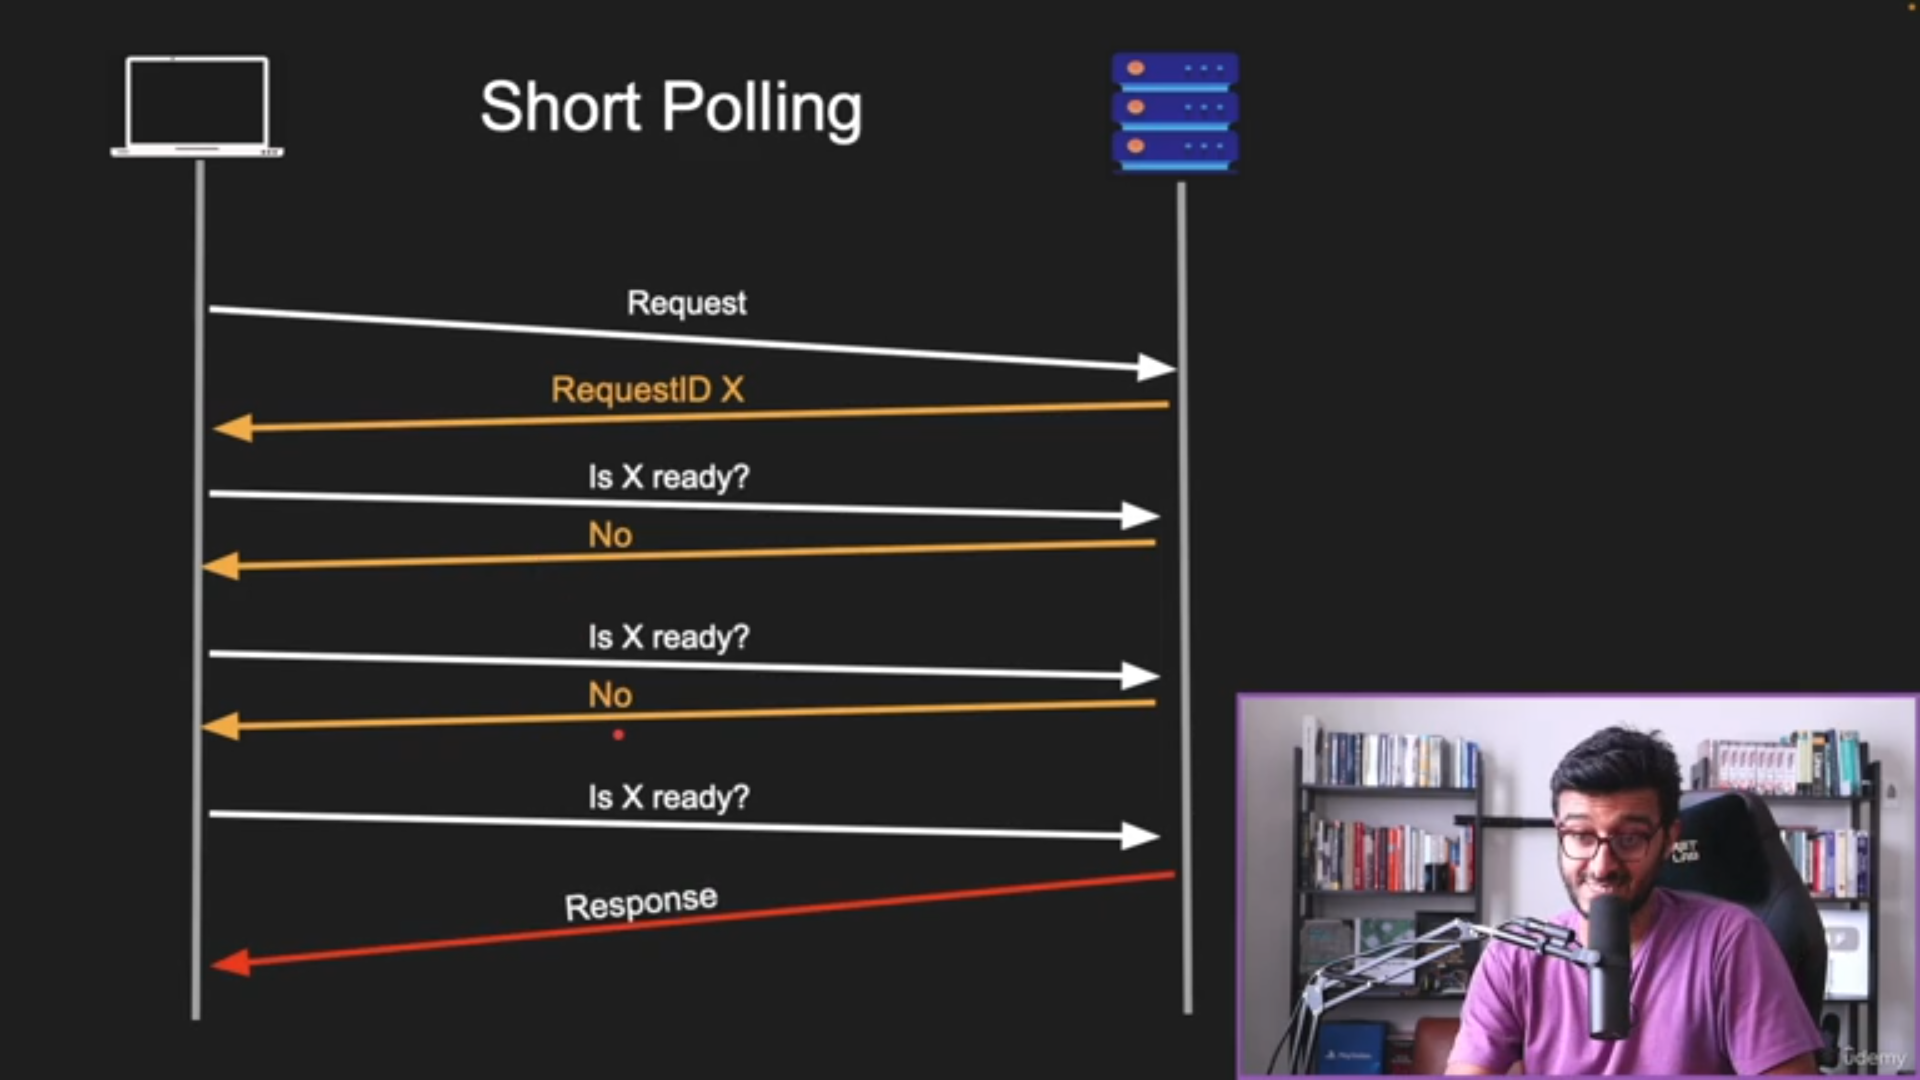
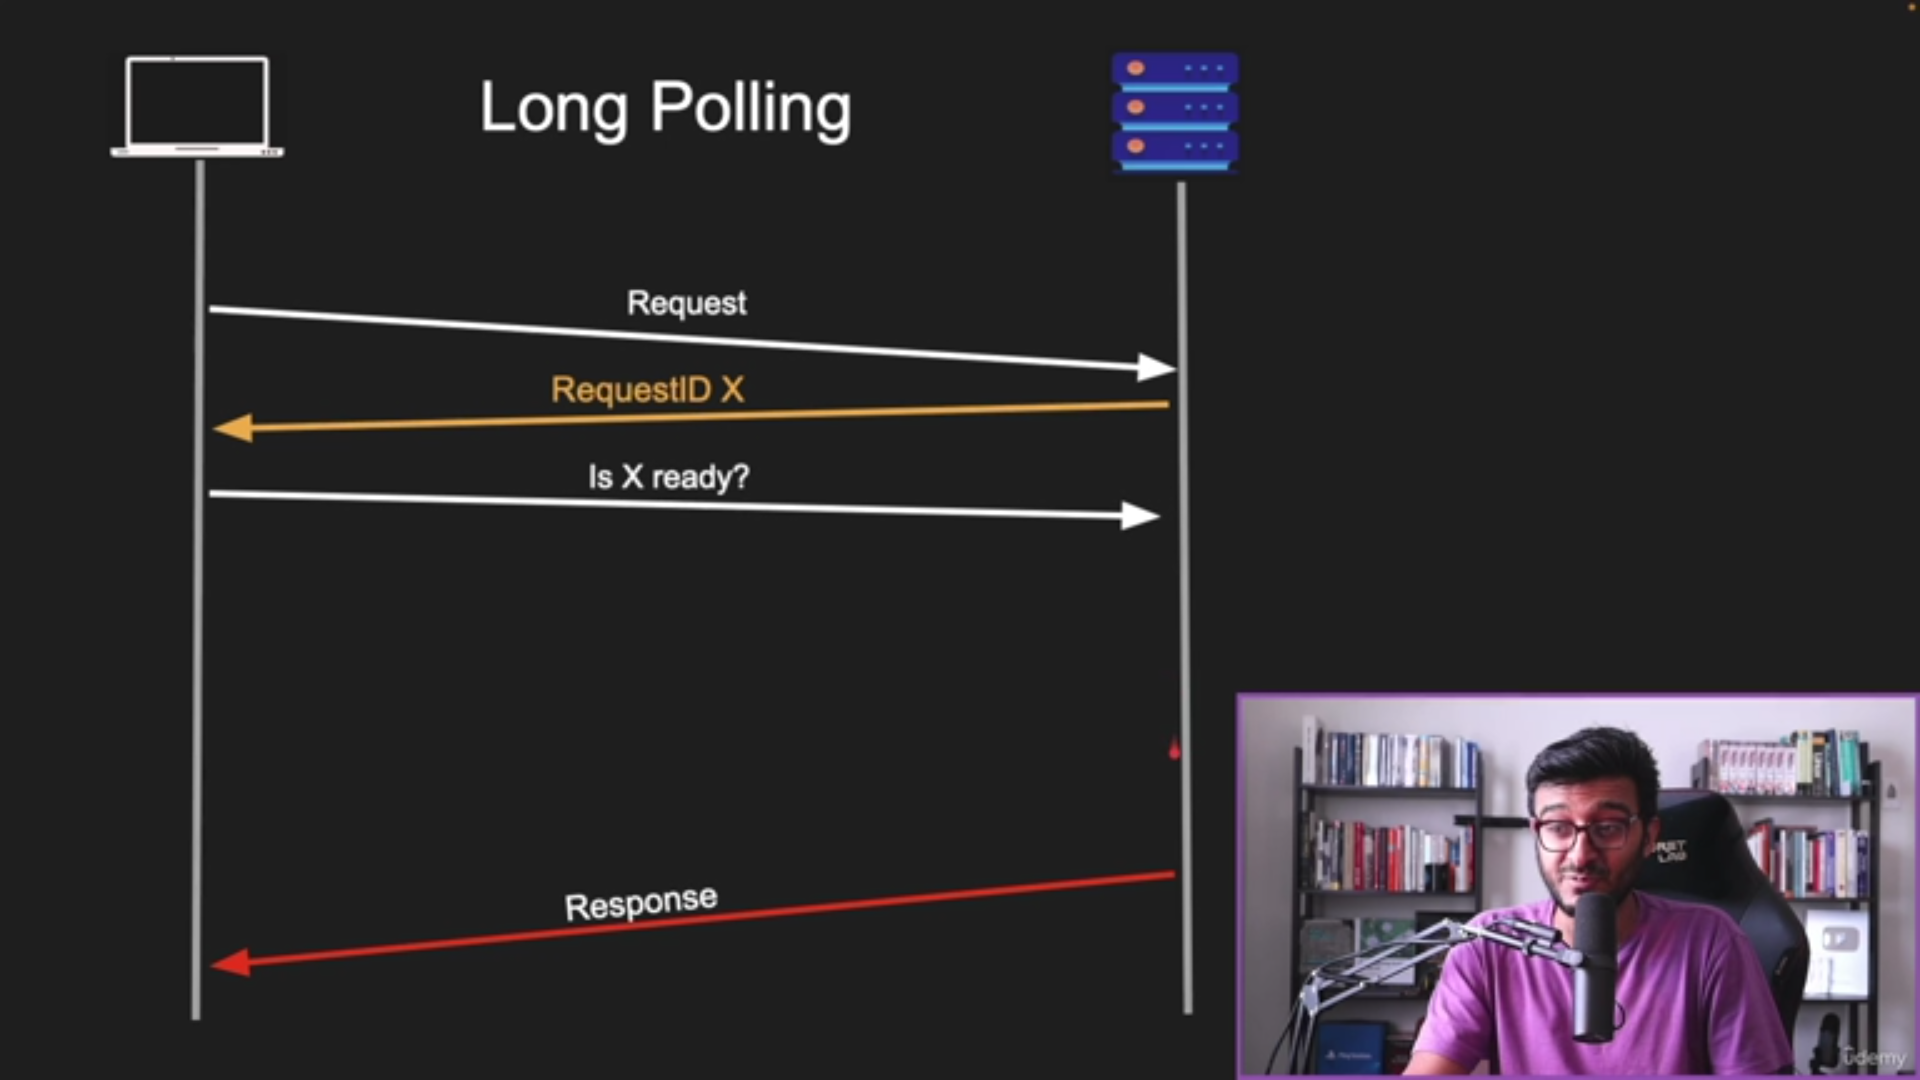

| **Aspect**                    | **Short Polling**                                                | **Long Polling**                                                                                                            | **Push (WebSocket / SSE)**                                                     |
| ----------------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Basic Idea**                | Client sends requests at regular intervals to check for updates. | Client sends a request and server keeps it open until data is available, then responds. Client immediately sends a new one. | A persistent connection where server can push updates instantly to the client. |
| **Connection Type**           | Repeated HTTP requests                                           | Repeated but long-held HTTP requests                                                                                        | Persistent full-duplex connection (WebSocket) or one-way (SSE)                 |
| **Server Resource Usage**     | High — many short requests per client                            | Moderate — fewer requests, but connections open longer                                                                      | Low (efficient) — one persistent connection                                    |
| **Client Resource Usage**     | High network usage due to frequent requests                      | Lower than short polling                                                                                                    | Very low after connection established                                          |
| **Latency (Update Delay)**    | High — limited by polling interval                               | Low — server responds immediately when new data is ready                                                                    | Very Low — real-time updates                                                   |
| **Scalability**               | Poor — large number of clients overwhelm server                  | Moderate — fewer concurrent requests                                                                                        | Good — efficient use of sockets and event-driven I/O                           |
| **Ease of Implementation**    | Simple — just periodic GET requests                              | Moderate — requires holding HTTP connections open                                                                           | Complex — need to handle persistent sockets or SSE streams                     |
| **Server Compatibility**      | Works everywhere (standard HTTP)                                 | Works everywhere (HTTP)                                                                                                     | Requires WebSocket or SSE support (may need proxy config)                      |
| **Reliability on Disconnect** | Easy to resume — just restart polling                            | Easy to resume — send new long poll request                                                                                 | Must handle reconnect logic manually                                           |
| **Use Case Examples**         | Checking email inbox periodically, cron-like data fetch          | Chat apps, notifications, progress updates                                                                                  | Live chat, stock prices, gaming, IoT dashboards                                |
| **Pros**                      | Simple, widely compatible                                        | Low latency, efficient compared to short polling                                                                            | Real-time, minimal network load, highly responsive                             |
| **Cons**                      | High load, wasteful, delayed updates                             | More complex, ties up HTTP connections                                                                                      | Harder to scale, requires persistent connections and sometimes proxy config    |





---

### 5.2 Server-Sent Events (SSE)

One-way communication from server to client for live updates.

Server-Sent Events (SSE) is a web API that enables a server to automatically push **real-time updates** to a client (typically a web page) over a **single HTTP connection**. This provides a **unidirectional communication channel** from the server to the client, ideal for scenarios like **live sports scores, stock tickers, news feeds, and notifications.**



#### 🧩 Key Concepts

* **Unidirectional:** Data flows only from the **server to the client** after the initial connection is established.
* **Uses Standard HTTP:** SSE works over **standard HTTP or HTTP/2** protocols, making it **firewall- and proxy-friendly**, unlike WebSockets which use a separate protocol.
* **text/event-stream MIME Type:** The server must set the `Content-Type` header of its response to `text/event-stream` to indicate an SSE stream.
* **EventSource API:** On the client side, the JavaScript `EventSource` object is used to open the connection, listen for events, and handle incoming messages.
* **Automatic Reconnection:** The client's `EventSource` automatically attempts to **reconnect** to the server if the connection drops and can use the `Last-Event-ID` header to resume from the last message received.
* **Simple Event Format:** Events are sent as a simple series of text lines, typically with `data:`, `event:`, or `id:` fields, terminated by a double newline.



#### 🔄 How SSE Works

SSE operates as a **unidirectional stream** between the client and server:

1. **Client → Server (Initial Request)**
   The client sends an HTTP `GET` request to start the stream:

   ```http
   GET /events HTTP/1.1
   Accept: text/event-stream
   ```

   The server keeps the connection **open**, continuously sending updates instead of closing it.

2. **Server → Client (Event Stream)**
   The server sends events as they occur:

   ```
   data: New message arrived\n\n
   data: Another update\n\n
   ```

   Each message (event1, event2, etc.) flows through the same persistent connection.

3. **No Reverse Communication**
   The client **cannot send data back** over the same channel. If bidirectional communication is needed, a separate HTTP request or WebSocket must be used.



#### 💻 Example Implementations

##### **Client-Side (JavaScript)**

```javascript
const eventSource = new EventSource("/server-events");

eventSource.onmessage = function(event) {
    console.log(event.data); // Handle incoming data
};

eventSource.onopen = function() {
    console.log("Connection opened");
};

eventSource.onerror = function(event) {
    console.error("EventSource error:", event);
};
```

##### **Server-Side (Spring Boot Example)**

```java
import org.springframework.http.MediaType;
import org.springframework.web.bind.annotation.GetMapping;
import org.springframework.web.bind.annotation.RestController;
import reactor.core.publisher.Flux;
import java.time.Duration;

@RestController
public class ServerEventsController {

    @GetMapping(value = "/server-events", produces = MediaType.TEXT_EVENT_STREAM_VALUE)
    public Flux<String> streamEvents() {
        // Sends a message every second
        return Flux.interval(Duration.ofSeconds(1))
                   .map(sequence -> "data: Event number " + sequence + "\n\n");
    }
}
```



#### 📊 Advantages (Pros)

* ✅ Simple and lightweight — works over standard HTTP.
* ✅ Auto-reconnects on connection drop.
* ✅ Native browser support with `EventSource` API.
* ✅ Efficient for live text or JSON streaming.
* ✅ Firewall- and proxy-friendly (no special ports).



#### ⚠️ Disadvantages (Cons)

* ❌ **One-way only** — cannot send messages from client → server.
* ❌ **Text-only** — binary data must be base64-encoded.
* ❌ **Connection limits** — browsers limit open HTTP connections per domain.
* ❌ **May timeout** on some proxies/firewalls without keepalive messages.
* ❌ **Scalability** — many open connections can stress servers.



#### 🔁 Comparison with Other Techniques

| Feature        | SSE                       | WebSocket                       | Long Polling            |
| -------------- | ------------------------- | ------------------------------- | ----------------------- |
| Direction      | Server → Client           | Bidirectional                   | Client → Server (poll)  |
| Protocol       | HTTP / HTTP/2             | Custom (WS)                     | HTTP                    |
| Complexity     | Simple                    | Moderate                        | Simple but inefficient  |
| Binary Support | No                        | Yes                             | No                      |
| Auto-Reconnect | Yes                       | Manual                          | Each request reconnects |
| Use Cases      | Live feeds, notifications | Chat, gaming, real-time control | Legacy compatibility    |



#### 🧭 Summary

Server-Sent Events offer a **lightweight, reliable, and browser-native way** for servers to push data to clients in real-time. They are perfect for **live dashboards, feeds, and notifications**, but not for use cases requiring **two-way communication** — in such cases, **WebSockets** or **WebRTC** are better suited.

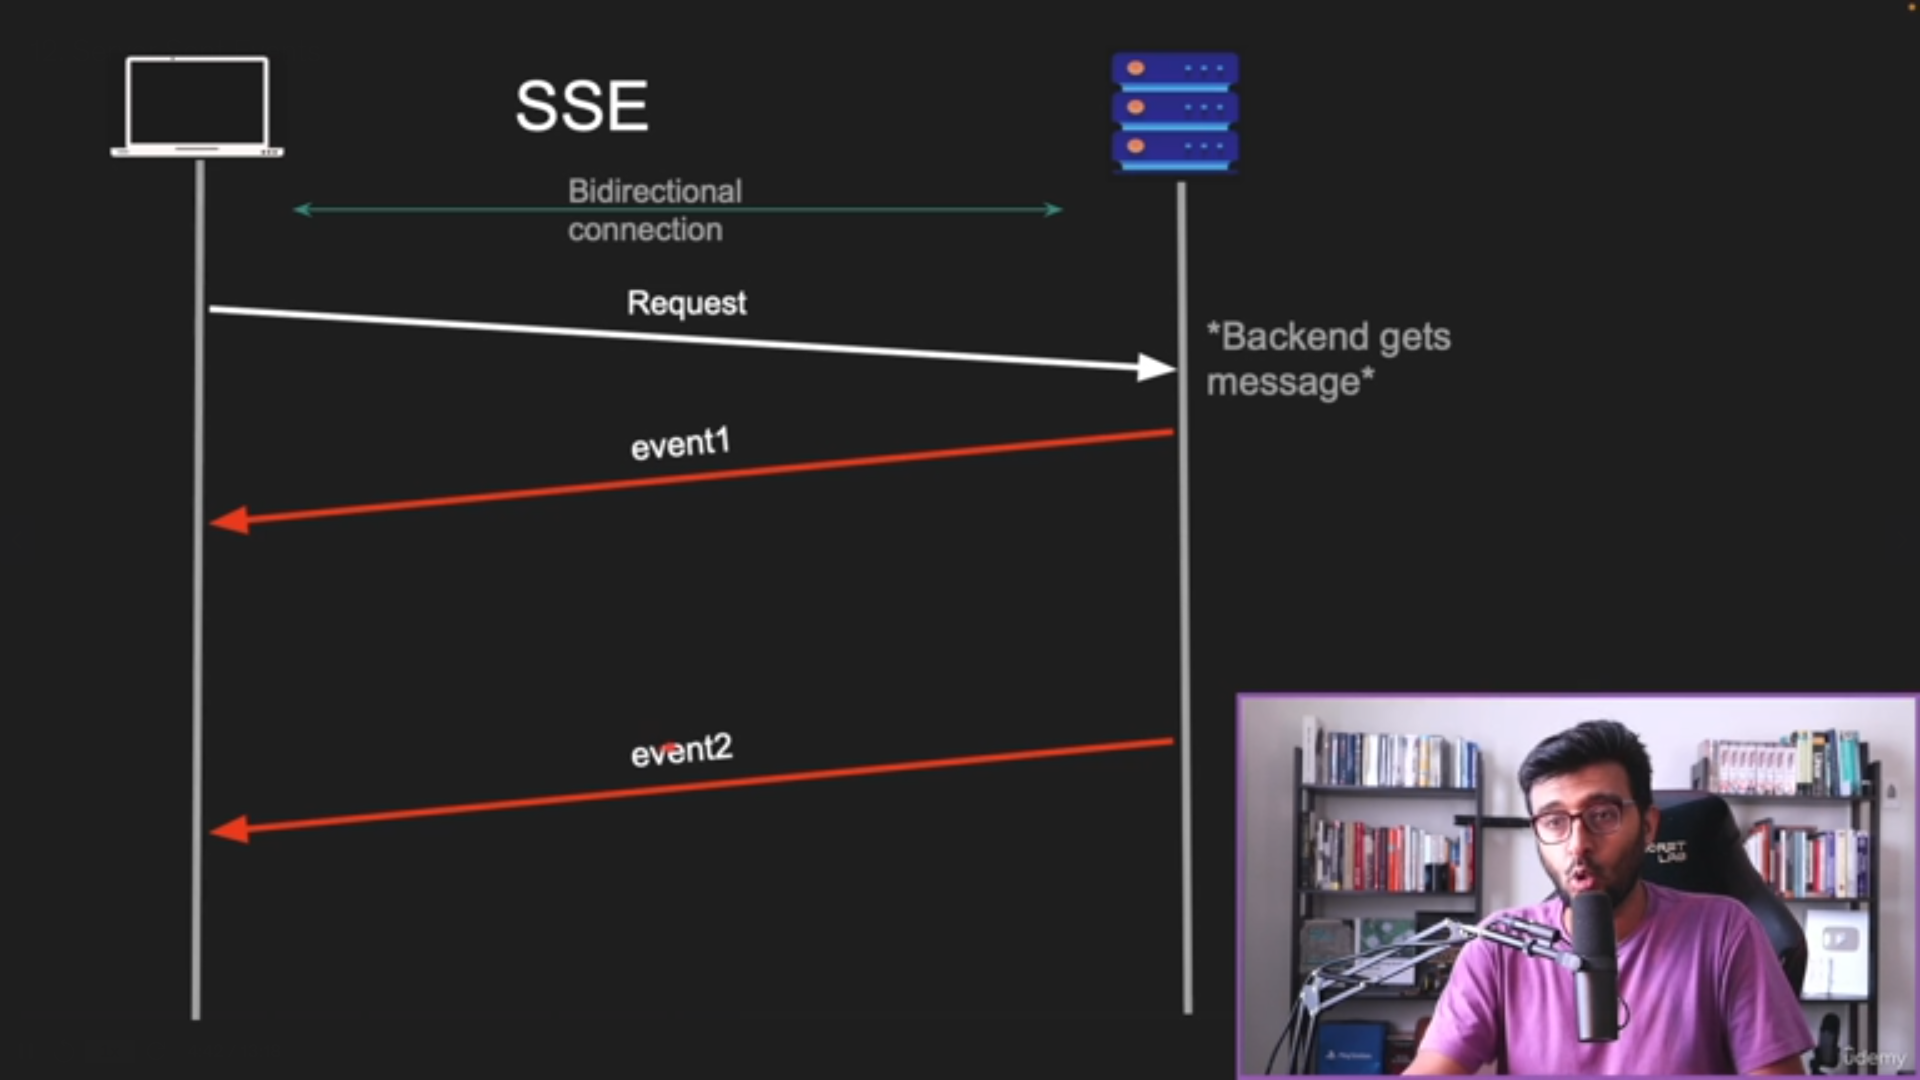

**Example (FastAPI):**

```python
from fastapi import FastAPI
from fastapi.responses import StreamingResponse
import asyncio

app = FastAPI()

@app.get("/events")
async def events():
    async def event_stream():
        while True:
            yield f"data: Server time is {time.time()}\n\n"
            await asyncio.sleep(1)
    return StreamingResponse(event_stream(), media_type="text/event-stream")
```

---

### 5.3 Publish-Subscribe Pattern

**Example:**

* Publisher (FastAPI) → pushes messages to Redis channel.
* Subscriber (NestJS) → listens to updates in real-time.

---

### 5.4 Multiplexing and Demultiplexing

Used in **HTTP/2** and **gRPC** to send multiple logical streams over one connection.

**Example:**

* Multiple API calls via a single TCP connection using HTTP/2.

---

### 5.5 Stateful vs Stateless

| Type          | Description              | Example        |
| ------------- | ------------------------ | -------------- |
| **Stateful**  | Server tracks sessions   | WebSocket chat |
| **Stateless** | Each request independent | REST API       |

Stateless systems scale better, while stateful ones suit real-time interaction.

---

### 5.6 Sidecar Pattern

Used in microservices to run an auxiliary process (e.g., proxy, logger, or security manager).

**Example:**

* **Istio** uses **Envoy** as a sidecar container to handle telemetry and routing.

---

## 6. Combining Async + Backend Patterns (Example Architecture)

Imagine a modern e-commerce system built using both **FastAPI** and **NestJS**:

1. **FastAPI (Python)** handles product APIs and async order requests.
2. **Celery Worker Queue** manages background jobs like order validation.
3. **Redis Cache-Aside** accelerates product lookups.
4. **Circuit Breaker** safeguards calls to payment services.
5. **Event-Driven Kafka** coordinates inventory and shipping.
6. **NestJS (JavaScript)** consumes events asynchronously and updates WebSocket clients.
7. **Sidecar Containers** in Kubernetes handle logging and monitoring.

This hybrid design ensures **low latency, fault tolerance, and high scalability**.

---

## 7. Conclusion

Asynchronous backends coupled with robust design patterns form the foundation of high-performance systems. Frameworks like **FastAPI** and **NestJS** leverage native async features, enabling:

* Faster I/O handling
* Better concurrency
* Enhanced fault isolation
* Seamless scalability

By adopting these design patterns, developers can craft resilient, real-time, and scalable microservices architectures for the next generation of cloud-native applications.


## Chrome's 6-Connection Limit Explained




### 1. Overview

The statement that **Chrome limits to 6 simultaneous connections per domain** is generally correct. This rule applies to most modern browsers and originates from the HTTP/1.1 specification. It exists to ensure fair resource usage and avoid overloading web servers.

---

### 2. Chrome's Connection Limit

* **Definition:** Chrome, like most browsers, restricts the number of concurrent HTTP connections to a single domain (also known as an origin).
* **Typical Value:** The standard limit is **6 simultaneous connections per host**.
* **Reason for the Limit:**

  * Prevents excessive server load.
  * Improves overall web performance.
  * Helps manage network resources efficiently.

---

### 3. How It Affects File Downloads

#### a. **Simultaneous Progress**

If you attempt to download multiple files from the **same domain** (e.g., `www.example.com`):

* Only **6 files** will actively download at the same time.
* The browser opens 6 HTTP connections and assigns one to each file.

#### b. **Queuing Behavior**

* Additional downloads (beyond 6) are **queued** by Chrome.
* When one of the active downloads finishes or a connection closes, the next queued download automatically starts.
* ✅ **Important:** There is **no total limit** on the number of files you can download — only on how many can run in parallel from a single domain.

#### c. **Different Domains**

If your files are hosted on **different domains**, Chrome treats each domain separately:

* You can have up to **6 active downloads per domain**.
* For example, 12 files from 12 different servers could all download simultaneously (depending on your network bandwidth and system resources).

---

### 4. Technical Notes

* This limit applies mainly to **HTTP/1.1** connections.
* Under **HTTP/2**, multiple streams can share a single TCP connection, effectively bypassing this limit by using **multiplexing**.
* Developers can improve download concurrency by:

  * Using **Content Delivery Networks (CDNs)** across different subdomains.
  * Upgrading to **HTTP/2 or HTTP/3**.

---

### 5. Summary Table

| Context                | Simultaneous Downloads | Behavior                   |
| ---------------------- | ---------------------- | -------------------------- |
| Same domain (HTTP/1.1) | 6                      | Remaining downloads queued |
| Different domains      | 6 per domain           | All can run in parallel    |
| HTTP/2 connection      | Multiplexed            | No strict per-domain limit |

---

### 6. Key Takeaways

* Chrome limits **6 active connections per domain** under HTTP/1.1.
* Downloads exceeding the limit are **queued automatically**.
* **HTTP/2** largely eliminates this restriction using multiplexing.
* The total number of downloads is **not limited** — only simultaneous connections per host.


---

| Feature / Version | HTTP/1.0        | HTTP/1.1    | HTTP/2            | HTTP/3                 |
| ----------------- | --------------- | ----------- | ----------------- | ---------------------- |
| Year Introduced   | 1996            | 1997        | 2015              | 2022                   |
| Connection Type   | One per request | Persistent  | Multiplexed (TCP) | Multiplexed (UDP/QUIC) |
| Protocol Format   | Text            | Text        | Binary            | Binary                 |
| Compression       | ❌               | ✅           | ✅ (HPACK)         | ✅ (QPACK)              |
| Security          | Optional        | Optional    | Usually HTTPS     | Built-in TLS 1.3       |
| Performance       | Slow            | Better      | Fast              | Fastest                |
| Transport Layer   | TCP             | TCP         | TCP               | UDP (QUIC)             |
| Use Case          | Legacy          | Common APIs | Modern web        | Streaming, Realtime    |
